In [1]:
%matplotlib inline

# Need to install geopandas and pysal using conda

import pandas as pd
import numpy as np
import geopandas

pd.options.display.max_rows = 10

In [2]:
divisions = geopandas.read_file("zip://./datasets/pd_divisions_datasd.zip")
beats = geopandas.read_file("zip://./datasets/pd_beats_datasd.zip")

df = pd.read_csv('./datasets/vehicle_stops_2016_datasd_original.csv')

In [3]:
divisions

,objectid,div_num,div_name,geometry
0,1,1,NORTHERN,"POLYGON ((6257399.473922551 1913720.405154973,..."
1,2,2,NORTHEASTERN,"POLYGON ((6329136.046000302 1985638.385990649,..."
2,3,3,EASTERN,"POLYGON ((6321693.529061213 1885496.922888145,..."
3,4,5,CENTRAL,"POLYGON ((6287304.000071391 1850636.00015606, ..."
4,5,6,WESTERN,"POLYGON ((6280788.357918963 1873275.705860808,..."
5,6,7,SOUTHERN,"POLYGON ((6294084.232901976 1801858.102961391,..."
6,7,8,MID-CITY,"POLYGON ((6300695.999862134 1863112.000138387,..."
7,8,9,NORTHWESTERN,"POLYGON ((6290347.458551392 1952824.477209151,..."
8,9,4,SOUTHEASTERN,"POLYGON ((6314753.249962807 1851441.907993063,..."


In [4]:
stops_raw = df[['arrested','service_area']].dropna()

In [5]:
arrest_values = ['Y', 'N']
stops_raw2 = stops_raw.loc[stops_raw['arrested'].isin(arrest_values)]

In [6]:
stops_raw3 = stops_raw2.loc[stops_raw2['service_area'] != 'Unknown']

In [7]:
stop_count = stops_raw3.groupby('service_area').count()
stop_count

,arrested
service_area,
110,6265
120,7468
130,23
230,4732
240,5389
...,...
810,3009
820,2686
830,2832


In [8]:
arrested_final_count = stops_raw3.loc[stops_raw3['arrested'] == 'Y'].groupby('service_area').count()
arrested_final_count

,arrested
service_area,
110,78
120,87
230,33
240,38
310,65
...,...
720,37
810,44
820,82


In [9]:
not_arrested_final_count = stops_raw3.loc[stops_raw3['arrested'] == 'N'].groupby('service_area').count()
not_arrested_final_count

,arrested
service_area,
110,6187
120,7381
130,23
230,4699
240,5351
...,...
810,2965
820,2604
830,2698


In [10]:
probability_of_arrest = (arrested_final_count/stop_count).fillna(0)
probability_of_arrest

,arrested
service_area,
110,0.012450
120,0.011650
130,0.000000
230,0.006974
240,0.007051
...,...
810,0.014623
820,0.030529
830,0.047316


In [11]:
beats2 = beats[['div', 'serv']]
# Only care about one appearance of each serv
grouped = beats2.groupby('serv').first()
beats3 = grouped[['div']]
beats3

,div
serv,
0,0
110,1
120,1
230,2
240,2
...,...
720,7
810,8
820,8


In [12]:
stop_count = stop_count.reset_index()
probability_of_arrest = probability_of_arrest.reset_index()
beats3 = beats3.reset_index()

In [13]:
stop_count['service_area'] = stop_count['service_area'].astype(int)
probability_of_arrest['service_area'] = probability_of_arrest['service_area'].astype(int)
beats3['serv'] = beats3['serv'].astype(int)

In [14]:
stopped_by_area = beats3.join(stop_count.set_index('service_area'), on='serv').dropna()
stopped_by_area[['arrested']] = stopped_by_area[['arrested']].fillna(0).astype(int)
stopped_by_area

,serv,div,arrested
1,110,1,6265
2,120,1,7468
3,230,2,4732
4,240,2,5389
5,310,3,6957
...,...,...,...
15,720,7,3845
16,810,8,3009
17,820,8,2686
18,830,8,2832


In [15]:
stopped_by_area = stopped_by_area.groupby('div').sum()['arrested']
stopped_by_area

div
1    13733
2    10121
3    11023
4     6734
5    11177
6     7568
7     8189
8     8527
9     4125
Name: arrested, dtype: int64

In [16]:
divsums_stop = divisions.join(stopped_by_area, on='div_num')
divsums_stop

,objectid,div_num,div_name,geometry,arrested
0,1,1,NORTHERN,"POLYGON ((6257399.473922551 1913720.405154973,...",13733
1,2,2,NORTHEASTERN,"POLYGON ((6329136.046000302 1985638.385990649,...",10121
2,3,3,EASTERN,"POLYGON ((6321693.529061213 1885496.922888145,...",11023
3,4,5,CENTRAL,"POLYGON ((6287304.000071391 1850636.00015606, ...",11177
4,5,6,WESTERN,"POLYGON ((6280788.357918963 1873275.705860808,...",7568
5,6,7,SOUTHERN,"POLYGON ((6294084.232901976 1801858.102961391,...",8189
6,7,8,MID-CITY,"POLYGON ((6300695.999862134 1863112.000138387,...",8527
7,8,9,NORTHWESTERN,"POLYGON ((6290347.458551392 1952824.477209151,...",4125
8,9,4,SOUTHEASTERN,"POLYGON ((6314753.249962807 1851441.907993063,...",6734


In [17]:
arrested_prob_by_area = beats3.join(probability_of_arrest.set_index('service_area'), on='serv').dropna()
arrested_prob_by_area[['arrested']] = arrested_prob_by_area[['arrested']].fillna(0)
arrested_prob_by_area

,serv,div,arrested
1,110,1,0.012450
2,120,1,0.011650
3,230,2,0.006974
4,240,2,0.007051
5,310,3,0.009343
...,...,...,...
15,720,7,0.009623
16,810,8,0.014623
17,820,8,0.030529
18,830,8,0.047316


In [18]:
arrested_prob_by_area = arrested_prob_by_area.groupby('div').sum()['arrested']
arrested_prob_by_area

div
1    0.024100
2    0.014025
3    0.015984
4    0.050502
5    0.064020
6    0.026901
7    0.018140
8    0.092468
9    0.008727
Name: arrested, dtype: float64

In [19]:
divsums_arrest = divisions.join(arrested_prob_by_area, on='div_num')
divsums_arrest

,objectid,div_num,div_name,geometry,arrested
0,1,1,NORTHERN,"POLYGON ((6257399.473922551 1913720.405154973,...",0.024100
1,2,2,NORTHEASTERN,"POLYGON ((6329136.046000302 1985638.385990649,...",0.014025
2,3,3,EASTERN,"POLYGON ((6321693.529061213 1885496.922888145,...",0.015984
3,4,5,CENTRAL,"POLYGON ((6287304.000071391 1850636.00015606, ...",0.064020
4,5,6,WESTERN,"POLYGON ((6280788.357918963 1873275.705860808,...",0.026901
5,6,7,SOUTHERN,"POLYGON ((6294084.232901976 1801858.102961391,...",0.018140
6,7,8,MID-CITY,"POLYGON ((6300695.999862134 1863112.000138387,...",0.092468
7,8,9,NORTHWESTERN,"POLYGON ((6290347.458551392 1952824.477209151,...",0.008727
8,9,4,SOUTHEASTERN,"POLYGON ((6314753.249962807 1851441.907993063,...",0.050502


0     Annotation(6.26293e+06, 1.88254e+06, 'Northern')
1    Annotation(6.30719e+06, 1.92606e+06, 'Northeas...
2      Annotation(6.30493e+06, 1.87686e+06, 'Eastern')
3      Annotation(6.28675e+06, 1.84079e+06, 'Central')
4       Annotation(6.2684e+06, 1.85211e+06, 'Western')
5     Annotation(6.31917e+06, 1.78645e+06, 'Southern')
6     Annotation(6.29965e+06, 1.85404e+06, 'Mid-city')
7    Annotation(6.2719e+06, 1.92608e+06, 'Northwest...
8    Annotation(6.30992e+06, 1.83743e+06, 'Southeas...
dtype: object

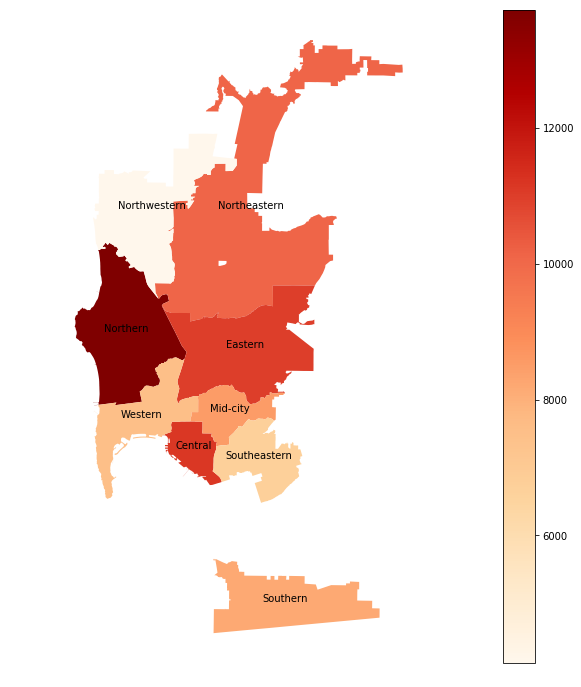

In [20]:
ax = divsums_stop.plot(column='arrested', figsize=(30, 12), cmap='OrRd', legend=True)
ax.set_axis_off()
divsums_stop.apply(lambda x: ax.annotate(s=x.div_name.capitalize(), xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

0     Annotation(6.26293e+06, 1.88254e+06, 'Northern')
1    Annotation(6.30719e+06, 1.92606e+06, 'Northeas...
2      Annotation(6.30493e+06, 1.87686e+06, 'Eastern')
3      Annotation(6.28675e+06, 1.84079e+06, 'Central')
4       Annotation(6.2684e+06, 1.85211e+06, 'Western')
5     Annotation(6.31917e+06, 1.78645e+06, 'Southern')
6     Annotation(6.29965e+06, 1.85404e+06, 'Mid-city')
7    Annotation(6.2719e+06, 1.92608e+06, 'Northwest...
8    Annotation(6.30992e+06, 1.83743e+06, 'Southeas...
dtype: object

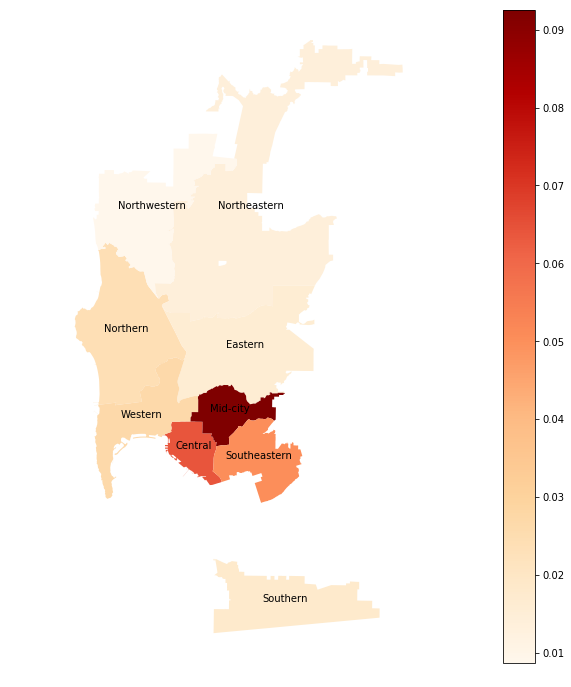

In [21]:
ax = divsums_arrest.plot(column='arrested', figsize=(30, 12), cmap='OrRd', legend=True)
ax.set_axis_off()
divsums_arrest.apply(lambda x: ax.annotate(s=x.div_name.capitalize(), xy=x.geometry.centroid.coords[0], ha='center'),axis=1)